In [1]:
%run py_import.py

**解决元素重叠问题**

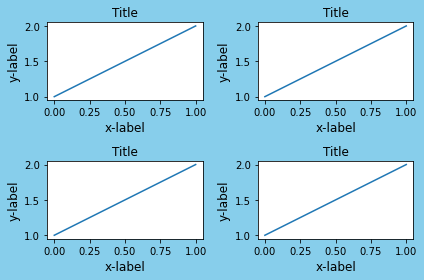

In [18]:
def example_plot(ax, fontsize = 12):
    ax.plot([1,2])
    ax.set_xlabel('x-label',fontsize = fontsize)
    ax.set_ylabel('y-label',fontsize = fontsize)
    ax.set_title('Title',fontsize = fontsize)

fig,axes = plt.subplots(2,2)
fig.set_facecolor('skyblue')
example_plot(axes[0,0])
example_plot(axes[0,1])
example_plot(axes[1,0])
example_plot(axes[1,1])

fig.tight_layout()  # tight_layout避免多图重叠
# fig.subplots_adjust(0,0,1,1,wspace = 0.5, hspace = 1)

**自定义布局**

<AxesSubplot:>

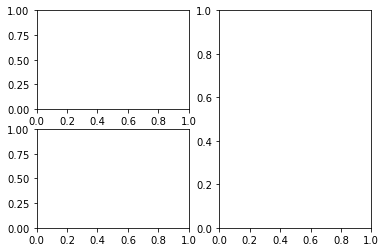

In [20]:
# 简单布局
plt.subplot(2,2,1)
plt.subplot(2,2,3)
plt.subplot(1,2,2)

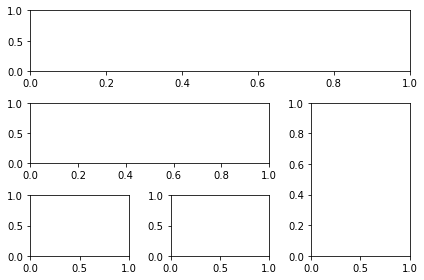

In [28]:
# 复杂布局
fig = plt.figure()
gs = fig.add_gridspec(3,3)   # 3行3列
fig.add_subplot(gs[0,0:3])
fig.add_subplot(gs[1,0:2])
fig.add_subplot(gs[1:3,2])
fig.add_subplot(gs[2,0])
fig.add_subplot(gs[2,1])
fig.tight_layout()

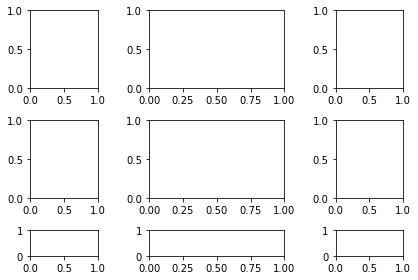

In [30]:
fig = plt.figure()
width = (1,2,1)  # 设置宽度比例为1:2:1
height = (3,3,1)  # 设置高度比例为3:3:1
gs = fig.add_gridspec(3,3,width_ratios = width,height_ratios = height)
for row in range(0,3):
    for col in range(0,3):
        fig.add_subplot(gs[row,col])
fig.tight_layout()

**手动设置位置**

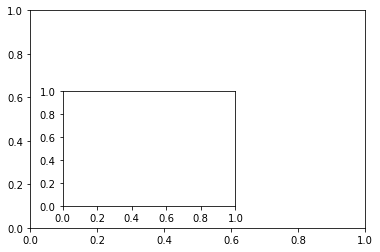

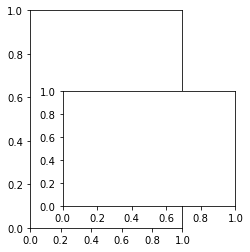

In [32]:
fig = plt.figure()
fig.add_subplot(111)
fig.add_axes([0.2,0.2,0.4,0.4])

fig,axes = plt.subplots(1,2)
axes[1].set_position([0.2,0.2,0.4,0.4])

### 散点图和直方图合并实战

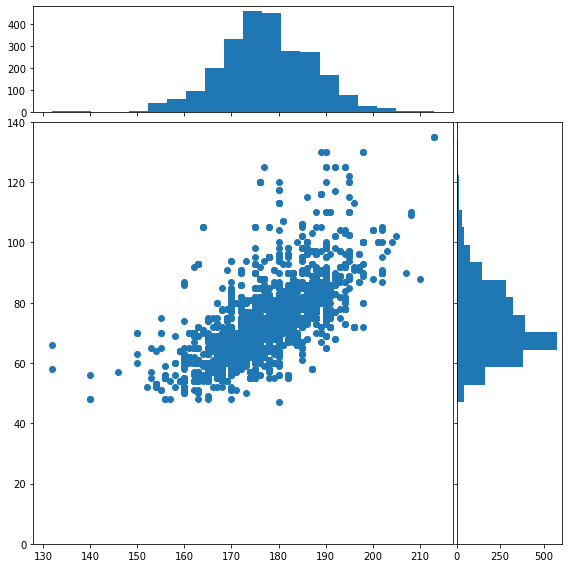

In [60]:
athletes = pd.read_csv('athlete_events.csv')[:4000]
male_athletes = athletes[athletes['Sex'] == 'M'][['Height','Weight']]

widths = (4,1)
heights = (1,4)

fig = plt.figure(figsize = (8,8))
gs = fig.add_gridspec(2,2,width_ratios = widths, height_ratios = heights)

# 顶部直方图
ax1 = fig.add_subplot(gs[0,0])
ax1.hist(male_athletes['Height'],bins = 20)
for tick in ax1.get_xticklabels():
    tick.set_visible(False)
    
# 中间散点图
ax2 = fig.add_subplot(gs[1,0])
ax2.scatter('Height','Weight',data = male_athletes)
ax2.set_ylim(0,140)

# 右边直方图
ax3 = fig.add_subplot(gs[1,1])
ax3.hist(male_athletes['Weight'],bins = 20,orientation = 'horizontal')
ax3.set_yticks(range(0,160,20))
ax3.set_ylim(0,140)
for tick in ax3.get_yticklabels():
    tick.set_visible(False)

fig.tight_layout(h_pad = 0, w_pad = 0)
    
plt.show()

### 笔记：
1. 自动调整布局：
    * fig.tight_layout()，可以自动调节，不需要传入参数，两个参数w_pad（水平方向间距）、h_pad（垂直方向间距）
    * fig.subplots_adjust(left,right,bottom,top,wspace,hspace) 不会自动调节，需要通过参数实现
2. 自定义布局：
    * 简单的：subplot方法即可实现
    * 复杂的：通过gridspec对象来实现，创建GridSpec的方法为`fig.add_gridspec(rows,cors,width_ratios,height_ratios)`